In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## gpu check
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [3]:
# XOR
X = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]]).to(device)
Y = torch.FloatTensor([[0],[1],[1],[0]]).to(device) 

In [4]:
linear = nn.Linear(2,1,bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear,sigmoid).to(device)
criterion = nn.BCELoss() # Binary Cross Entropy
optimizier = torch.optim.SGD(model.parameters(),lr = 1)

0 0.712735652923584
1000 0.6931471824645996
2000 0.6931471824645996
3000 0.6931471824645996
4000 0.6931471824645996
5000 0.6931471824645996
6000 0.6931471824645996
7000 0.6931471824645996
8000 0.6931471824645996
9000 0.6931471824645996


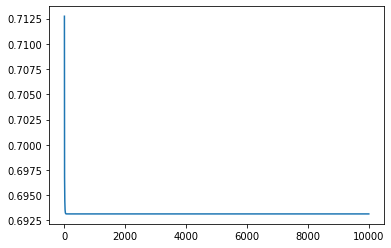

In [5]:
loss_arr = []
for step in range(10000):
    optimizier.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis,Y)
    cost.backward()
    optimizier.step()
    loss_arr.append(cost.item())
    if step % 1000 == 0:
        print(step,cost.item())
plt.plot(loss_arr)

In [6]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis>0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('Hypothesis : ',hypothesis.detach(),'\nCorrect: ',predicted.detach(),'\nAccuracy: ',accuracy.item())

Hypothesis :  tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]]) 
Correct:  tensor([[0.],
        [0.],
        [0.],
        [0.]]) 
Accuracy:  0.5


In [7]:
linear1 = nn.Linear(2,2,bias=True)
linear2 = nn.Linear(2,1,bias=True)
model2 = nn.Sequential(linear1,sigmoid,linear2,sigmoid).to(device)
optimizier2 = torch.optim.SGD(model2.parameters(),lr = 0.1)

0 0.735253095626831
1000 0.6930556297302246
2000 0.6928203701972961
3000 0.6920766234397888
4000 0.6878001093864441
5000 0.6465792655944824
6000 0.5468806028366089
7000 0.34876808524131775
8000 0.10855457186698914
9000 0.055071666836738586


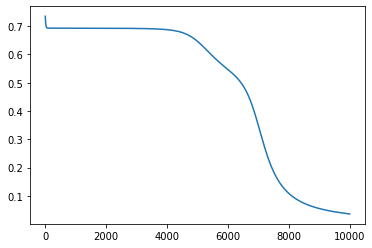

In [8]:
loss_arr2 = []
for step in range(10000):
    optimizier2.zero_grad()
    hypothesis = model2(X)
    cost = criterion(hypothesis,Y)
    cost.backward()
    optimizier2.step()
    loss_arr2.append(cost.item())
    if step % 1000 == 0:
        print(step,cost.item())
plt.plot(loss_arr2)

In [9]:
with torch.no_grad():
    hypothesis = model2(X)
    predicted = (hypothesis>0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('Hypothesis : ',hypothesis.detach(),'\nCorrect: ',predicted.detach(),'\nAccuracy: ',accuracy.item())

Hypothesis :  tensor([[0.0345],
        [0.9499],
        [0.9721],
        [0.0289]]) 
Correct:  tensor([[0.],
        [1.],
        [1.],
        [0.]]) 
Accuracy:  1.0
